# Wine_Not

# Project Goals
- Discover drivers of wine quality
- Use clustering for feature engineering 
- Bulid a classification model to predict wine quality

# Imports

In [1]:
import wrangle as w
import functions as f

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')


# Acquire
- The dataset used for this project was obtained from Data.World's Wine Quality Dataset (https://data.world/data-society/wine-quality-dataset). 
- Contains separate CSV files for red and white wines, with information on several wine properties.

# Prepare
- Combine Red and White Wine CSVs: Merge the two separate CSV files for red and white wines into a single DataFrame, adding a new column called color to indicate whether each observation corresponds to a red or white wine.

- Check Column Data Types: Ensure that each column's data type is appropriate for the data it contains. If necessary, convert columns to appropriate data types.

- Investigate Missing Values: Identify and handle any missing values in the dataset. Possible strategies include dropping rows with missing values or filling in the missing values using appropriate methods (e.g., mean, median, or mode).

- Binned quality score into 3 categories
    - Low (3, 4, 5)
    - Medium (6)
    - High(7, 8, 9)
    
- Split the data into train, validate and Test



# Data Dictionary

<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Value</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Fixed Acidity</td>
      <td>Numeric</td>
      <td>The amount of fixed acids in wine (g/dm³)</td>
    </tr>
    <tr>
      <td>Volatile Acidity</td>
      <td>Numeric</td>
      <td>The amount of volatile acids in wine (g/dm³)</td>
    </tr>
    <tr>
      <td>Citric Acid</td>
      <td>Numeric</td>
      <td>The amount of citric acid in wine (g/dm³)</td>
    </tr>
    <tr>
      <td>Residual Sugar</td>
      <td>Numeric</td>
      <td>The amount of residual sugar in wine (g/dm³)</td>
    </tr>
    <tr>
      <td>Chlorides</td>
      <td>Numeric</td>
      <td>The amount of chlorides in wine (g/dm³)</td>
    </tr>
    <tr>
      <td>Free Sulfur Dioxide</td>
      <td>Numeric</td>
      <td>The amount of free sulfur dioxide in wine (mg/dm³)</td>
    </tr>
    <tr>
      <td>Total Sulfur Dioxide</td>
      <td>Numeric</td>
      <td>The amount of total sulfur dioxide in wine (mg/dm³)</td>
    </tr>
    <tr>
      <td>Density</td>
      <td>Numeric</td>
      <td>The density of wine (g/cm³)</td>
    </tr>
    <tr>
      <td>pH</td>
      <td>Numeric</td>
      <td>The pH value of wine</td>
    </tr>
    <tr>
      <td>Sulphates</td>
      <td>Numeric</td>
      <td>The amount of sulphates in wine (g/dm³)</td>
    </tr>
    <tr>
      <td>Alcohol</td>
      <td>Numeric</td>
      <td>The alcohol content of wine (% vol)</td>
    </tr>
    <tr>
      <td>Quality</td>
      <td>Numeric (0-10)</td>
      <td>The sensory quality score of wine</td>
    </tr>
  </tbody>
</table>

# Lets get the data 

In [2]:
# get data that's already split into train, val, test
train, val, test = w.wrangle_wine()

In [3]:
# Look at first 5 rows of data
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2391,6.4,0.460,0.08,4.90,0.046,34.0,144.0,0.99445,3.10,0.56,10.0,5,white
989,9.7,0.295,0.40,1.50,0.073,14.0,21.0,0.99556,3.14,0.51,10.9,6,red
2805,7.0,0.260,0.46,15.55,0.037,61.0,171.0,0.99860,2.94,0.35,8.8,6,white
2909,5.2,0.365,0.08,13.50,0.041,37.0,142.0,0.99700,3.46,0.39,9.9,6,white
41,8.8,0.610,0.30,2.80,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,4,red


# Summary of the data

In [4]:
train.describe()
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

# Explore

## The distribution of each feature

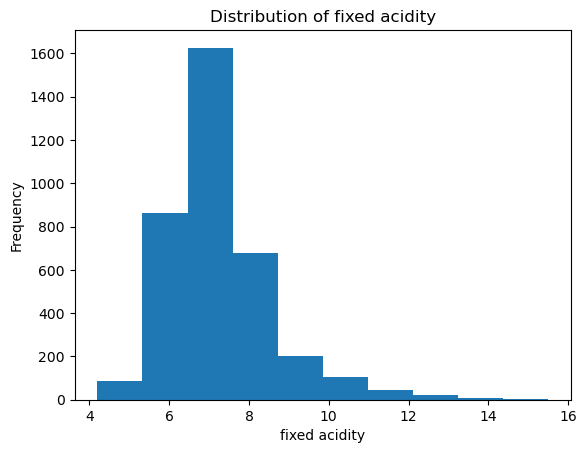

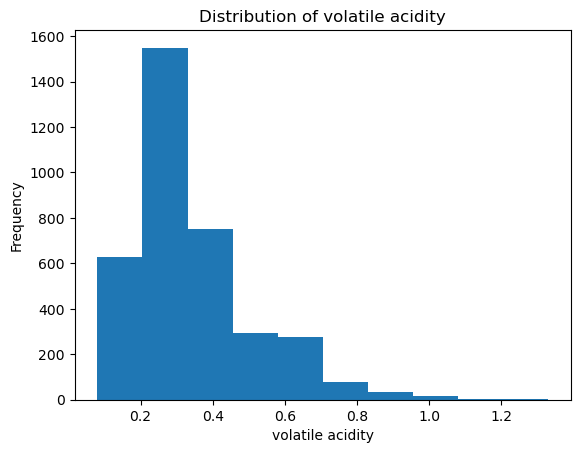

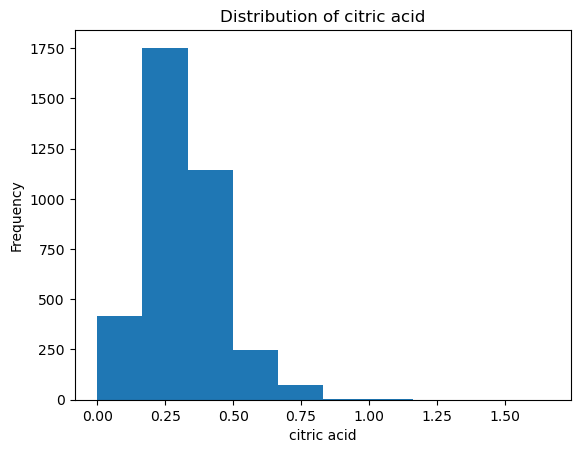

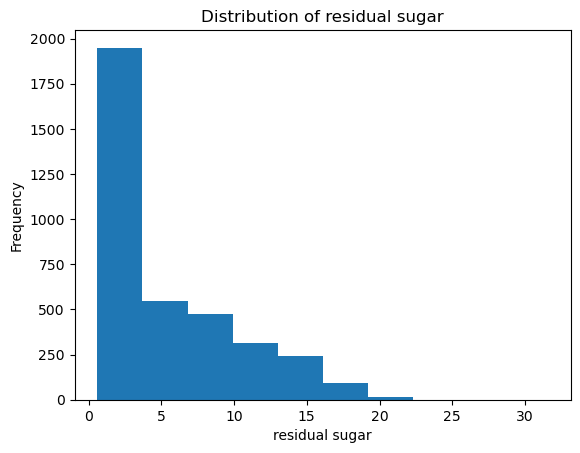

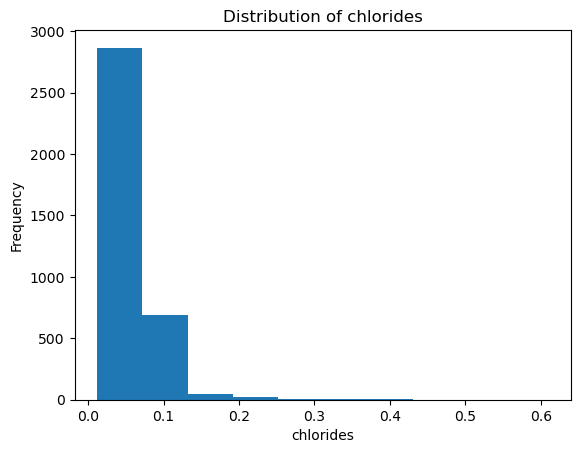

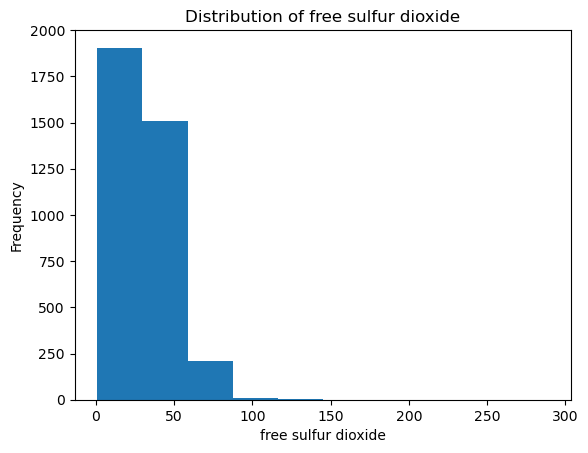

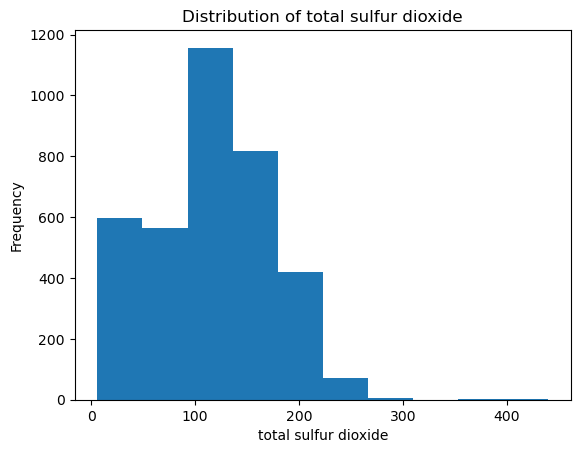

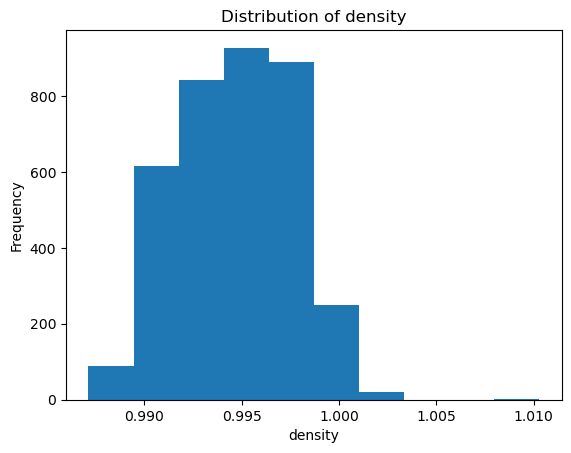

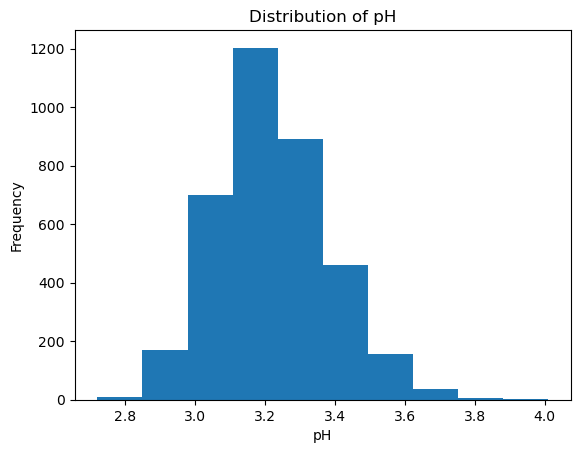

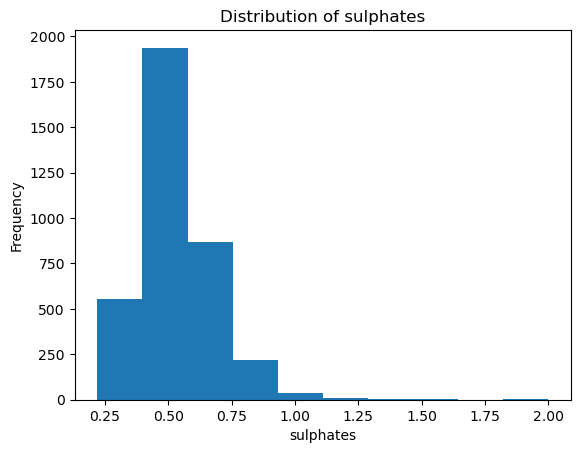

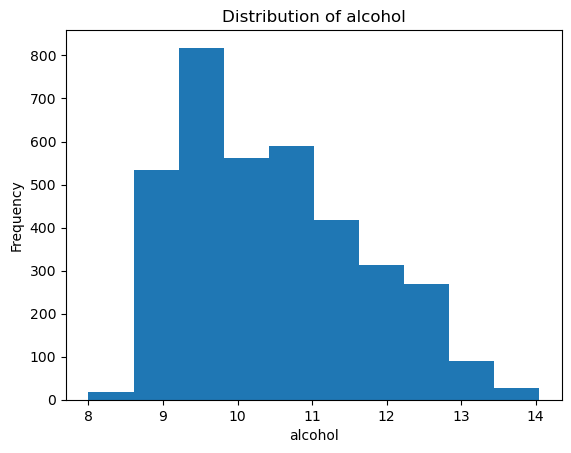

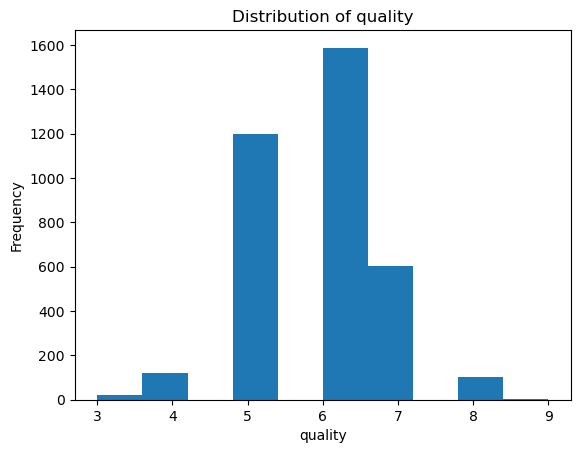

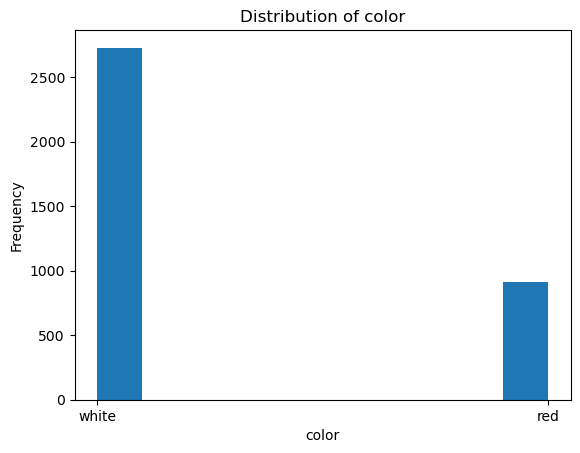

In [5]:
# distribution of each column in train 
f.get_distribution(train)

- Some normal distribution 
- Most right side skewed

## What is the relation between density and volatile acidity 

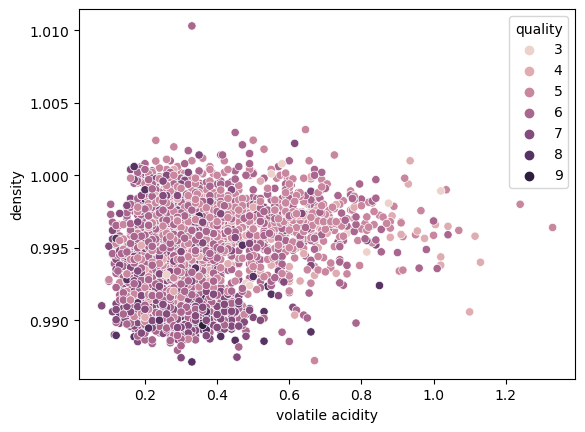

In [6]:
# scatter plot for x and y with hue on quality 
f.get_scatterplot(train, 'volatile acidity', 'density', 'quality')

- bell like shape
- possible clustering
- will run a spearmanr test
- establish an alpha at 0.05

#### H$o$: There is no correlation between density and fixed acidity 
#### H$a$: There is correlation between density and fixed acidity 

In [7]:
# Get stats test for two features
f.get_stats_test(train, stats.spearmanr, 'density', 'fixed acidity')

We can reject the null hypothesis


(0.451845047376341, 1.633484415682964e-182)

## What is the relationship between alcohol and density?

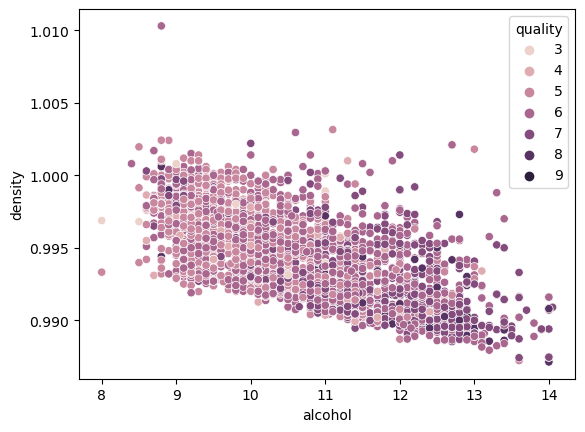

In [8]:
# scatter plot for x and y with hue on quality 
f.get_scatterplot(train, 'alcohol', 'density', 'quality')

- negitive correlation 
- possible clustering towards higher alcohol level
- use a pearsonr and test for correlation
- alpha remains 0.05

#### H$o$: There is no correlation between density and alcolhol 
#### H$a$: There is correlation between density and alcolhol

In [9]:
# Get stats test for two features
f.get_stats_test(train, stats.pearsonr, 'density', 'alcohol')

We can reject the null hypothesis


(-0.7022811865547577, 0.0)

## What is the correlation between volatile acidity and chlorides¶ 

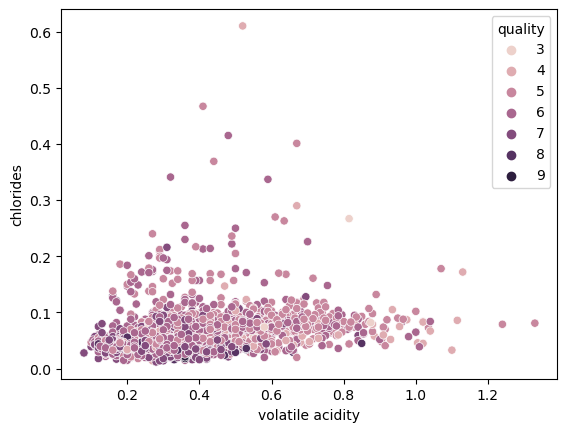

In [10]:
# scatter plot for x and y with hue on quality 
f.get_scatterplot(train, 'volatile acidity', 'chlorides', 'quality')

- Looks like very small correlation 
- more possible clustering on the lower end of both features
- Use a pearsonr stats test for correlation
- alpha still 0.05

In [11]:
# Get stats test for two features
f.get_stats_test(train, stats.pearsonr, 'volatile acidity', 'chlorides')

We can reject the null hypothesis


(0.37854857295737737, 2.8840995636386577e-124)

## Clustering

### Scale the data

In [12]:
# return scaled data for train, val, test
train_scaled, val_scaled, test_scaled = w.scale_data(train, val, test)

In [13]:
# Check the scale
train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2391,0.194690,0.304,0.048193,0.138710,0.056856,0.114583,0.317972,0.315926,0.294574,0.191011,0.330579,5,white
989,0.486726,0.172,0.240964,0.029032,0.102007,0.045139,0.034562,0.363833,0.325581,0.162921,0.479339,6,red
2805,0.247788,0.144,0.277108,0.482258,0.041806,0.208333,0.380184,0.495037,0.170543,0.073034,0.132231,6,white
2909,0.088496,0.228,0.048193,0.416129,0.048495,0.125000,0.313364,0.425982,0.573643,0.095506,0.314050,6,white
41,0.407080,0.424,0.180723,0.070968,0.127090,0.055556,0.092166,0.451877,0.418605,0.162921,0.214876,4,red


### Bin the quality score (Low, Medium, High)

In [14]:
# Bin the qualilty score 
f.bin_quality(train_scaled, val_scaled, test_scaled)

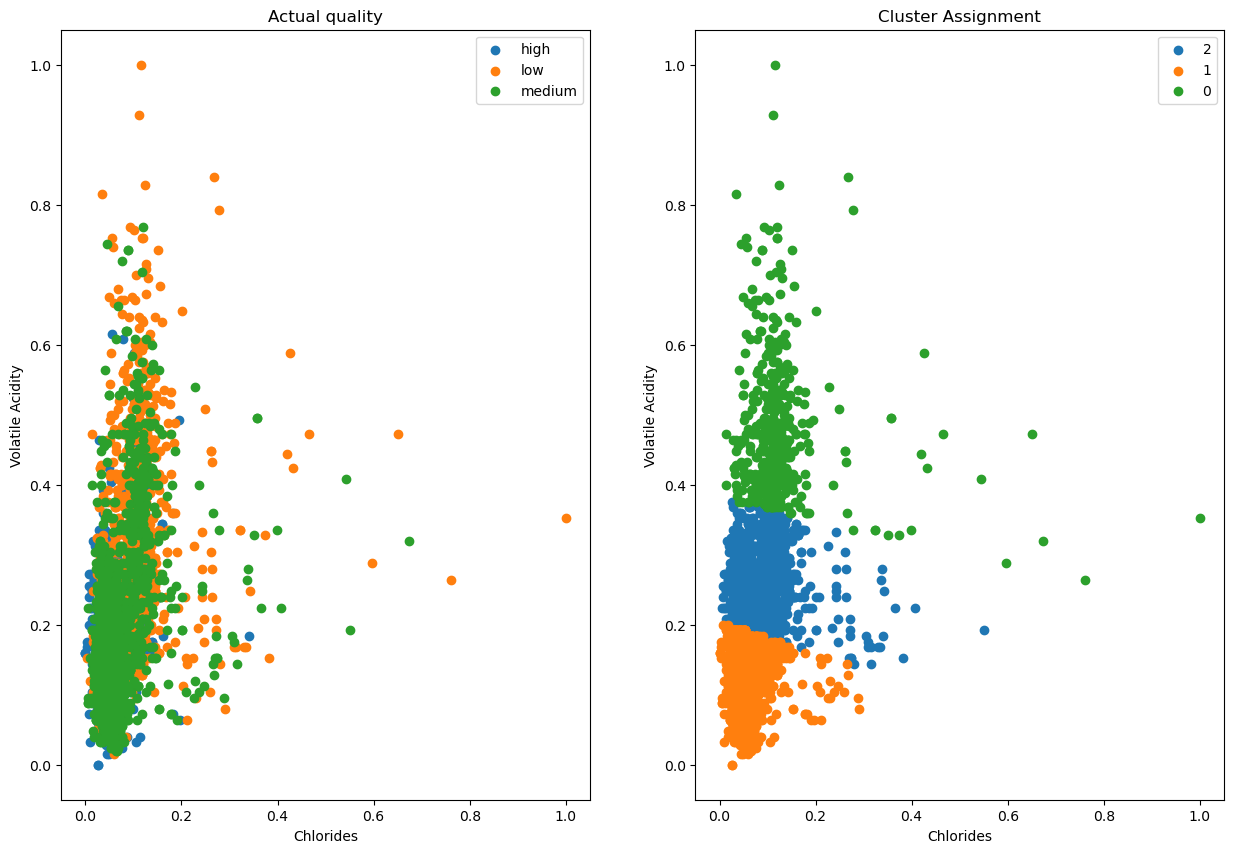

In [15]:
# get cluter and display actual vrs cluster assignment
f.get_cluster(train_scaled)

- Cluster on volatile acidity and chlorides were the only two features that would produce 3 clusters
- Not aligning with the actual
- will try in model as a feature 

# Explore Summary
- higher density, lower aclohol
- small correlation between chlorides and volatile acidity
- Clustering did not look useful but will try in modeling

# Features I'm moving on to modeling with:
- density
- alcohol
- chlorides
- volatile acidity

# Modeling

#### Baseline for target is the mode of quality binned

In [16]:
# Baseline for target quality binned 
baseline = f.get_model_baseline(train_scaled)
baseline 

0.43634863898817705

In [17]:
x_train, y_train, x_val, y_val, x_test, y_test = f.get_cols(train_scaled, val_scaled, test_scaled)

## Model with cluster as feature

In [18]:
f.model_with_cluster(train_scaled)

              precision    recall  f1-score   support

        high       0.54      0.67      0.60       713
         low       0.71      0.71      0.71      1337
      medium       0.63      0.57      0.60      1587

    accuracy                           0.64      3637
   macro avg       0.63      0.65      0.64      3637
weighted avg       0.64      0.64      0.64      3637



## Descision Tree

In [19]:
f.get_decisionTree_model(train_scaled, val_scaled, test_scaled)

              precision    recall  f1-score   support

        high       0.55      0.66      0.60       713
         low       0.71      0.71      0.71      1337
      medium       0.63      0.57      0.60      1587

    accuracy                           0.64      3637
   macro avg       0.63      0.65      0.64      3637
weighted avg       0.65      0.64      0.64      3637

Accuracy of Random Tree classifier on training set: 0.64
Accuracy of Random Tree classifier on validation set: 0.58


DecisionTreeClassifier(max_depth=7, random_state=706)

## Random Forrest

In [20]:
f.get_random_forest(train_scaled, val_scaled, test_scaled)

              precision    recall  f1-score   support

        high       0.68      0.41      0.51       713
         low       0.70      0.69      0.69      1337
      medium       0.59      0.70      0.64      1587

    accuracy                           0.64      3637
   macro avg       0.66      0.60      0.62      3637
weighted avg       0.65      0.64      0.63      3637



,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,model_preds,difference,baseline_accuracy
9,2,6,0.639538,0.605128,"[low, medium, low, low, low, low, medium, high...",0.03441,0.436349


## Logistic Regression 

In [21]:
f.get_lr(train_scaled, val_scaled, test_scaled)

Accuracy of Logistic Regression classifier on training set: 0.56
Accuracy of Logistic Regression classifier on validation set: 0.58
              precision    recall  f1-score   support

        high       0.54      0.27      0.36       713
         low       0.63      0.65      0.64      1337
      medium       0.52      0.63      0.57      1587

    accuracy                           0.56      3637
   macro avg       0.57      0.51      0.52      3637
weighted avg       0.57      0.56      0.55      3637



## K Nearest Neighbor

In [22]:
f.get_knn(train_scaled, val_scaled, test_scaled)

              precision    recall  f1-score   support

        high       0.66      0.77      0.71       713
         low       0.82      0.76      0.79      1337
      medium       0.77      0.76      0.76      1587

    accuracy                           0.76      3637
   macro avg       0.75      0.76      0.75      3637
weighted avg       0.77      0.76      0.76      3637

Accuracy of KNN classifier on training set: 0.76
Accuracy of KNN classifier on validation set: 0.55


# Compare Models
- All models did better than the baseline of 44%
- Decision Tree was best model when focusing on recall for high quality
- KNN was over fit on train with a 21% drop off on validate
- Random Forrest had better accuracy but bad on recall
- Logistic Regression overall worst preforming models
- Test on Decision Tree

# Test

In [24]:
f.get_decisionTree_model(train_scaled, val_scaled, test_scaled, t=1)

Accuracy of Random Tree classifier on test set: 0.57


DecisionTreeClassifier(max_depth=7, random_state=706)

# Conclusions

## Exploration
- drivers of quality
    - alcohol
    - density
    - volatile acidity 
    - Chlorides
- Clustering was not helpful in modeling

## Modeling
- All models did better than baseline
- Decision Tree had the best recall on high quality wine
- accuracy was 57% 
- 14% better than baseline

# Reccomedations and Next Steps
- look for clustering opportunities based on color
- examine more 3 dimensional clustering opportunties
- take out density or alcohol and run a KNN again, the colinearity may be causing the overfitting on our training set